In [2]:
import sys
!{sys.executable} -m pip install geopandas 

     |████████████████████████████████| 994 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 77.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 69.3 MB/s eta 0:00:01


For more information about mapclassify see https://pysal.org/mapclassify/api.html

In [8]:
import sys
!{sys.executable} -m pip install mapclassify

In [12]:
import sys
!{sys.executable} -m pip install libpysal

     |████████████████████████████████| 2.4 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 10.6 MB/s eta 0:00:01


In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
from geopandas import read_file
import mapclassify
mapclassify.__version__

'2.4.3'

In [3]:
import libpysal
libpysal.__version__

'4.5.1'

In [15]:
libpysal.examples.available()

Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",True
2,Atlanta,"Atlanta, GA region homicide counts and rates",True
3,Baltimore,Baltimore house sales prices and hedonics,True
4,Bostonhsg,Boston housing and neighborhood data,True
...,...,...,...
93,taz,Traffic Analysis Zones in So. California,True
94,tokyo,Tokyo Mortality data,True
95,us_income,Per-capita income for the lower 48 US states 1...,True
96,virginia,Virginia counties shapefile,True


There are a number of examples. You can find a comprehensive list https://pysal.org/notebooks/lib/libpysal/Example_Datasets.html

In [4]:
_ = libpysal.examples.load_example('South')
pth = libpysal.examples.get_path('south.shp')

Example not available: South
Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Rio Grande do Sul
Example not downloaded: Spirals
Example not downloaded: clearwater


In [5]:
from libpysal.examples import explain

In [6]:
explain('South')

In [43]:
_.get_file_list()

['/home/jovyan/pysal_data/South/__MACOSX/._south',
 '/home/jovyan/pysal_data/South/__MACOSX/south/._codebook.pdf',
 '/home/jovyan/pysal_data/South/__MACOSX/south/._.DS_Store',
 '/home/jovyan/pysal_data/South/__MACOSX/south/._south.html',
 '/home/jovyan/pysal_data/South/south/south.mif',
 '/home/jovyan/pysal_data/South/south/south.dbf',
 '/home/jovyan/pysal_data/South/south/south.gpkg',
 '/home/jovyan/pysal_data/South/south/south.gdb/a00000001.TablesByName.atx',
 '/home/jovyan/pysal_data/South/south/south.gdb/a00000005.gdbtablx',
 '/home/jovyan/pysal_data/South/south/south.gdb/a00000002.gdbtable',
 '/home/jovyan/pysal_data/South/south/south.gdb/gdb',
 '/home/jovyan/pysal_data/South/south/south.gdb/a00000005.CatItemTypesByUUID.atx',
 '/home/jovyan/pysal_data/South/south/south.gdb/a00000003.gdbtablx',
 '/home/jovyan/pysal_data/South/south/south.gdb/a00000003.gdbindexes',
 '/home/jovyan/pysal_data/South/south/south.gdb/a00000009.gdbindexes',
 '/home/jovyan/pysal_data/South/south/south.gdb/

In [7]:
df = read_file(pth)

In [8]:
South_tf= gpd.read_file(_.get_path('south.shp'))

In [9]:
df.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Hancock,West Virginia,54,029,54029,54,29,54029,1,1.682864,...,2.557262,0.223645,0.295377,0.332251,0.363934,9.981297,7.8,9.785797,12.604552,"POLYGON ((-80.62805 40.39816, -80.60204 40.480..."
1,Brooke,West Virginia,54,009,54009,54,9,54009,1,4.607233,...,0.748370,0.220407,0.318453,0.314165,0.350569,10.929337,8.0,10.214990,11.242293,"POLYGON ((-80.52625 40.16245, -80.58760 40.175..."
2,Ohio,West Virginia,54,069,54069,54,69,54069,1,0.974132,...,3.310334,0.272398,0.358454,0.376963,0.390534,15.621643,12.9,14.716681,17.574021,"POLYGON ((-80.52517 40.02275, -80.73843 40.035..."
3,Marshall,West Virginia,54,051,54051,54,51,54051,1,0.876248,...,0.546097,0.227647,0.319580,0.320953,0.377346,11.962834,8.8,8.803253,13.564159,"POLYGON ((-80.52447 39.72113, -80.83248 39.718..."
4,New Castle,Delaware,10,003,10003,10,3,10003,1,4.228385,...,16.480294,0.256106,0.329678,0.365830,0.332703,12.035714,10.7,15.169480,16.380903,"POLYGON ((-75.77270 39.38301, -75.79144 39.723..."


<AxesSubplot:>

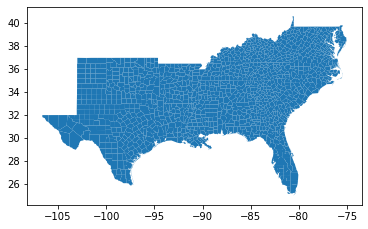

In [10]:
%matplotlib inline
South_tf.plot()

Visualize the Map of HR90 attribute [homicide rate per 100,000 (1960, 1970, 1980, 1990)] see details at https://www.rdocumentation.org/packages/spsur/versions/1.0.0.4/topics/NCOVR

In [11]:
South_tf['HR90'].describe()

count    1412.000000
mean        9.549293
std         7.038851
min         0.000000
25%         4.804794
50%         8.221220
75%        13.038023
max        64.260999
Name: HR90, dtype: float64

ValueError: Invalid scheme. Scheme must be in the set: dict_keys(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean', 'userdefined'])

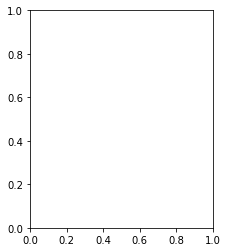

In [15]:
%matplotlib inline
South_tf.plot(column='HR90', scheme='QUANTILE', k=10, \
             cmap='BuPu', legend=True, 
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})


In [16]:
q10 = mapclassify.FisherJenks(South_tf.HR90, k=10)
q10

FisherJenks           

   Interval      Count
----------------------
[ 0.00,  2.30] |   152
( 2.30,  5.79] |   309
( 5.79,  8.77] |   298
( 8.77, 12.03] |   250
(12.03, 15.81] |   182
(15.81, 20.21] |   109
(20.21, 25.78] |    83
(25.78, 33.10] |    18
(33.10, 45.64] |     9
(45.64, 64.26] |     2

In [98]:
mapclassify.BoxPlot(South_tf.HR90)

BoxPlot               

   Interval      Count
----------------------
( -inf, -7.55] |     0
(-7.55,  4.80] |   353
( 4.80,  8.22] |   353
( 8.22, 13.04] |   353
(13.04, 25.39] |   321
(25.39, 64.26] |    32

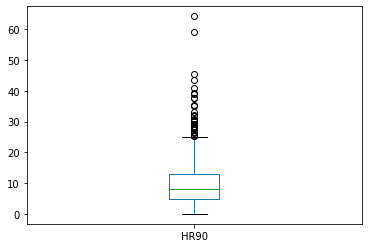

In [101]:
South_tf.boxplot(column=['HR90'], grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4170dcb90>]],
      dtype=object)

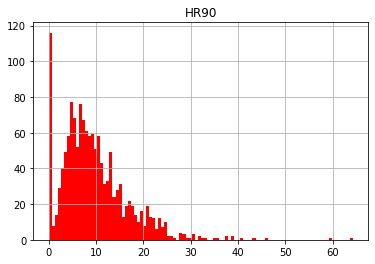

In [116]:
South_tf.hist('HR90', bins=100, color = 'red')